# Assignment: Scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m_o` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

(Hint1: `numpy`'s [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) has optional arguments for weighted random selection)

(Hint2: there is another very simple method to sample nodes based on their degree. In doing so, you'll create a long list.)

In [1]:
import numpy as np
import networkx as nx
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Write your function here
def BA_model(n, m_o):
    # first we create a random graph with m_o nodes, and each node has at least one link. 
    g = nx.Graph()
    g.add_nodes_from(list(range(m_o))) 
    g.add_edges_from(zip([m_o-1]*m_o,list(range(m_o))))  #total degree is 2*m_o
    # next we add new node for each timestep t
    source = m_o  # the new-added node (i.e., 5) which has m links, m <=m_o, we can simply assume that m = m_o
    targets = list(range(m_o+1))   # all existing nodes, plus new-node, i.e., [0, 1, 2, 3, 4, 5]

    while source < n:
        p = []
        for node in g:
            k = g.degree(node)   # calculate k(i)
            p.append(k/(2*m_o + m_o))   # p is the prob that a link to new node connects to node i    
        p.append(m_o/(2*m_o + m_o))  # finally add prob of self-loop
        #print (p)
        targets = np.random.choice(range(len(p)), m_o, p) #select 5 nodes from existing nodes based on their degrees
        #print (targets)
        g.add_edges_from(zip([source]*m_o, targets))   
        source += 1
    return g

## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m_o = 7`. Calculate (and print) the average shortest path length of the graph:

In [3]:
# Your code here
BA_graph = BA_model(1200, 7)
print(nx.average_shortest_path_length(BA_graph))

2.989695579649708


Calculate (and print) the average clustering coefficient of the graph:

In [4]:
# Your code here
print(nx.average_clustering(BA_graph))

0.013832200450550326


Now plot a histogram of the degree distribution of the graph (remember to include `%matplotlib inline` for plotting in Jupyter):

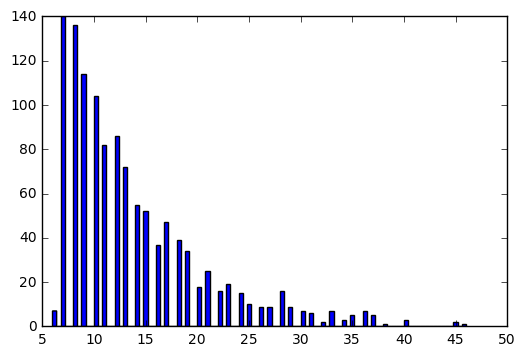

In [5]:
# Your code here
degree = []
for node in BA_graph:
    degree.append(BA_graph.degree(node))
pdf, bins, patch = plt.hist(degree, bins=100)

## 3. BA and ER comparison
Now lets compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

In [6]:
# Your code here
e = BA_graph.number_of_edges()
random_graph = nx.erdos_renyi_graph(1200, 2*e/(1200*1199))
print(nx.average_shortest_path_length(random_graph))

2.96101195440645


Calculate (and print) the average clustering coefficient of the graph:

In [7]:
# Your code here
print(nx.average_clustering(random_graph))

0.011002084311671637


Now plot a histogram of the degree distribution of the random graph:

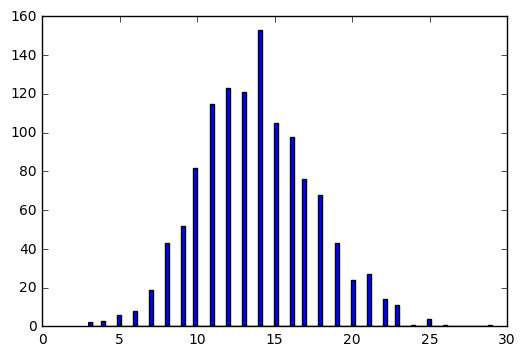

In [8]:
# Your code here
degree = []
for node in random_graph:
    degree.append(random_graph.degree(node))
pdf, bins, patch = plt.hist(degree, bins=100)

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

(use this markdown cell for your response)

For average shortest path lengths: BA graph is similar to ER graph. 
For average clustering coefficients: BA graph > ER graph.
For degree distribution: BA graph is power law, and ER graph is normal.   

## 4. Preferential attachment without using the degree

As explained in a video, it is possible to achieve the linear preferential attachment without calculating the degree by using the principle that we learned in the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

Helpful page:
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.edges.html 


In [9]:
# your code here
# Write your function here
def BA_model2(n, m_o):
    # first we create a random graph with m_o nodes, and each node has at least one link. 
    g = nx.Graph()
    g.add_nodes_from(list(range(m_o))) 
    g.add_edges_from(zip([m_o-1]*m_o,list(range(m_o))))
    # next we add new node for each timestep t
    source = m_o  # the new-added node
    targets = np.random.choice(range(m_o), m_o)  # randomly choose m_o nodes (targets)
    g.add_edges_from(zip([source]*m_o, targets))   # new node adds m_o links with the target nodes

    while source < n:
        # we follow the edges of each target and find all the other linked nodes, save them in the pool
        pool = [] 
        for target in targets:
            for e in g.edges_iter(target):
                pool.append(e[1])    
        # randomly choose m_o nodes from the pool as targets
        targets = []    
        for i in range(m_o):
            targets.append(random.choice(pool))
        g.add_edges_from(zip([source]*m_o, targets))    
        source += 1
    return g

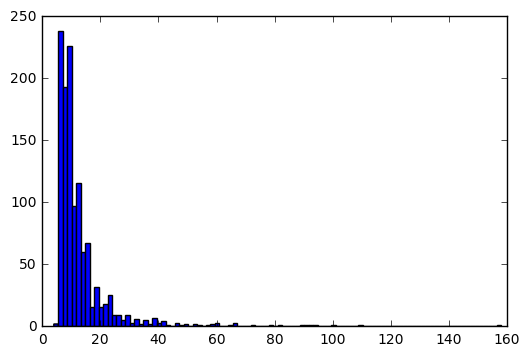

In [14]:
G = BA_model2(1200, 7)
degree = []
for node in G:
    degree.append(G.degree(node))
pdf, bins, patch = plt.hist(degree, bins=100)

## 5. Visualizing a scale-free graph
Write your graph to file and then load it into Gephi and make it presentable. Save your graph visualization as a PDF and upload it with this Jupyter notebook to Canvas.

In [15]:
nx.write_gml(BA_graph, 'BA_graph1.gml')
nx.write_gml(G, 'BA_graph2.gml')